In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [2]:
class_names=['shiro','pooh','doraemon']

In [4]:

base_dir = '/content/images'
X_data = []
y_data = []
for i, class_name in enumerate(class_names):
  folder_dir = os.path.join(base_dir,class_name)

  for file_name in os.listdir(folder_dir):
    img_file = os.path.join(folder_dir, file_name)
    img = cv2.imread(img_file)
    if img is None:
      pass
    else:
      img_resized = cv2.resize(img, (224, 224))
      img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
      img_scaled = preprocess_input(img_rgb)
      X_data.append(img_scaled)
      y_data.append(i)

X_data =np.array(X_data)
y_data =np.array(y_data)
print(X_data.shape)
print(y_data.shape)


(60, 224, 224, 3)
(60,)


In [6]:
base_model=VGG16(include_top=False,
               weights='imagenet',
               input_shape=(224, 224, 3))
base_model.summary()
base_model.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model=Sequential([base_model,
                  Flatten(),
                  Dense(64, activation='relu'),
                  Dense(32, activation='relu'),
                  Dense(3, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_data, y_data, epochs=5)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 16s/step - accuracy: 0.4458 - loss: 9.1633
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 15s/step - accuracy: 0.8056 - loss: 0.9058
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 16s/step - accuracy: 0.9889 - loss: 0.0104
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 17s/step - accuracy: 1.0000 - loss: 5.6676e-06
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 19s/step - accuracy: 1.0000 - loss: 3.3254e-05


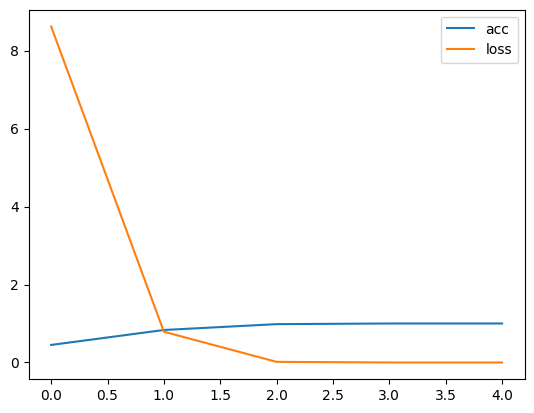

In [10]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [59]:
def img_preprocessing(img_file):
  img = cv2.imread(img_file) #/content/p.jpg에선 주석처리
  img_resized=cv2.resize(img_file, (224, 224))
  img_rgb=cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
  img_scaled=preprocess_input(img_rgb)
  img_batch=np.expand_dims(img_scaled, axis=0)
  return img_batch

In [44]:
from google.colab.patches import cv2_imshow

img_file='/content/s.jpg'
img=img_preprocessing(img_file)
prediction=model.predict(img)
print(np.argmax(prediction),class_names[np.argmax(prediction)])
#plt.title(class_names[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
0 shiro


In [26]:
img_file='/content/d.jpg'
img=img_preprocessing(img_file)
prediction=model.predict(img)
print(np.argmax(prediction), class_names[np.argmax(prediction)])
#plt.title(class_names[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
2 doraemon


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
0 shiro


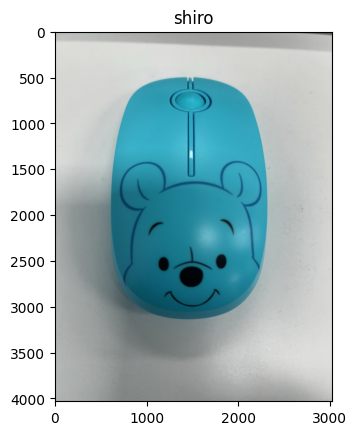

In [66]:
img_file=cv2.imread('/content/p.jpg')
img=img_preprocessing(img_file)
prediction=model.predict(img)
print(np.argmax(prediction),class_names[np.argmax(prediction)])
plt.imshow(img_file)
plt.title(class_names[np.argmax(prediction)])
plt.show()